In [1]:
import pandas as pd
import numpy as np

In [2]:
score =pd.DataFrame([ [21,43,97,37,57,69,50,45,87,67,49,55,76,27,94,39,41,63,87,71,50,69,44,97,68,44,45,39,67,47,23,67,78],
                   [21,21,21,20,22,24,23,21,20,23,23,21,26,27,19,27,23,24,23,26,26,22,22,23,22,25,24,23,23,24,25,26,23]
                     ]).transpose()
score
df =pd.DataFrame(score.values,columns=['score','age'])
df['score'].astype(float)
df['age'].astype(int)
df.head()

,score,age
0,21,21
1,43,21
2,97,21
3,37,20
4,57,22


In [3]:
labels = ['young','middle','old']
bins = [18,20,23,30]
df['Category'] = pd.cut(df.age,bins=bins,labels=labels)
df.head()

,score,age,Category
0,21,21,middle
1,43,21,middle
2,97,21,middle
3,37,20,young
4,57,22,middle


In [4]:
df['Grade'] = np.where(
    (df.score<40) &
    (df.score>=30),'E',
    np.where(
        (df.score>=40) &
        (df.score<=49),'D',
    np.where(
         (df.score>=50) &
        (df.score<=59),'C',
        np.where(
         (df.score>=60) &
        (df.score<=69),'B',
        
         np.where(
         (df.score>=70) &
        (df.score<=100),'A',
             'No Marks'
         )))))
df

,score,age,Category,Grade
0,21,21,middle,No Marks
1,43,21,middle,D
2,97,21,middle,A
3,37,20,young,E
4,57,22,middle,C
5,69,24,old,B
6,50,23,middle,C
7,45,21,middle,D
8,87,20,young,A
9,67,23,middle,B


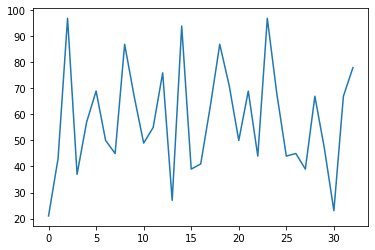

In [5]:
df['score'].plot(kind='line');

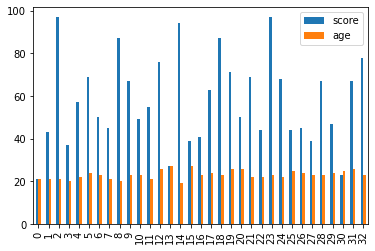

In [6]:
df.plot(kind='bar');

<AxesSubplot:xlabel='Grade'>

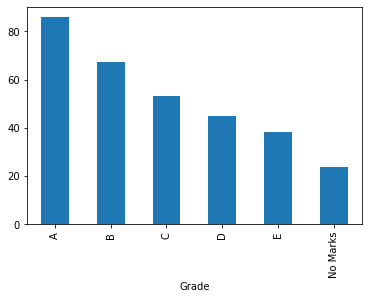

In [7]:
df.groupby(['Grade'])['score'].mean().plot(kind='bar')

In [8]:
df.columns

Index(['score', 'age', 'Category', 'Grade'], dtype='object')

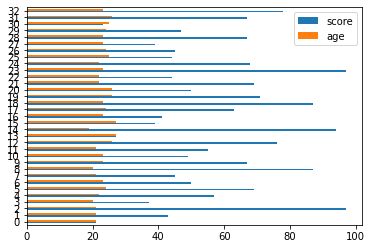

In [9]:
df.plot(kind='barh');

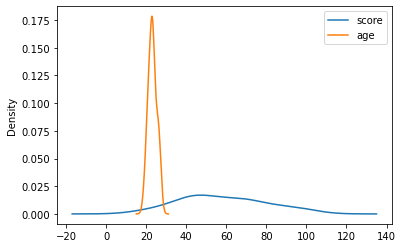

In [10]:
df.plot(kind='kde');

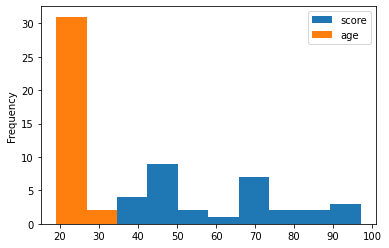

In [11]:
df.plot(kind='hist');

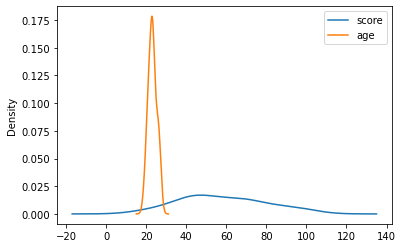

In [12]:
df.plot(kind='density');

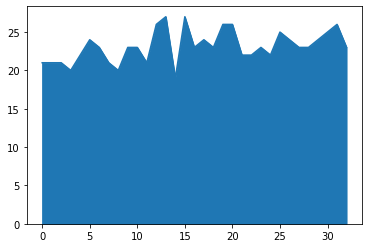

In [13]:
df['age'].plot(kind='area');

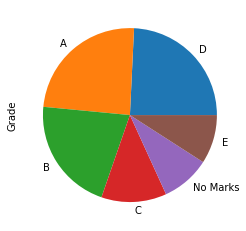

In [14]:
df['Grade'].value_counts().plot(kind='pie');

In [15]:
str1 =[]
for i in range(len(df)):
     str1.append(round(i*0.35,3))
df['Standardized'] = pd.DataFrame(str1)
df.head()

,score,age,Category,Grade,Standardized
0,21,21,middle,No Marks,0.00
1,43,21,middle,D,0.35
2,97,21,middle,A,0.70
3,37,20,young,E,1.05
4,57,22,middle,C,1.40


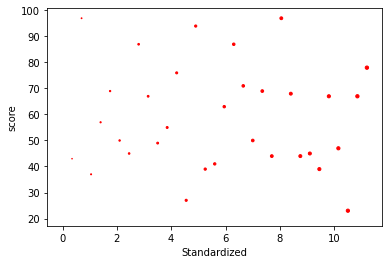

In [16]:
df.plot.scatter( x='Standardized',y='score',s='Standardized',c='r',subplots=True);

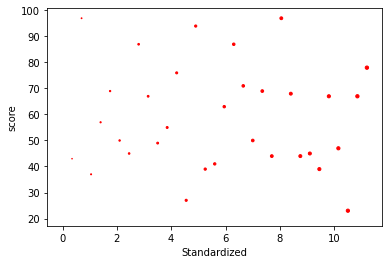

In [17]:
df.plot(kind='scatter', x='Standardized',y='score',s='Standardized',c='r',subplots=True);

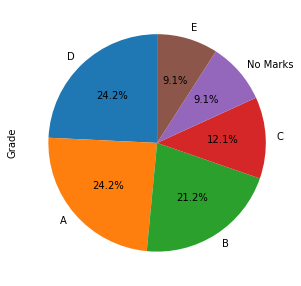

In [18]:
df['Grade'].value_counts().plot(kind='pie',y='score', figsize=(5, 5), autopct='%1.1f%%', startangle=90);

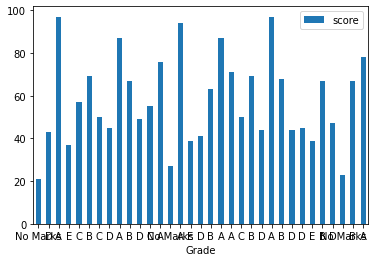

In [19]:
df.plot.bar(x='Grade',y='score',rot=0);

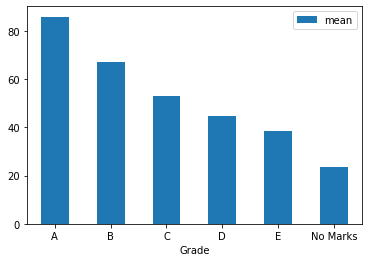

In [20]:
df.groupby(['Grade'])['score'].agg(['mean']).plot.bar(rot=0);

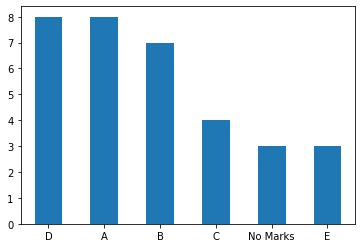

In [21]:
df['Grade'].value_counts().plot(kind='bar',rot=0);

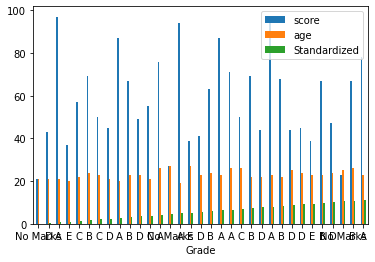

In [22]:
df.plot.bar(x='Grade',rot=0);

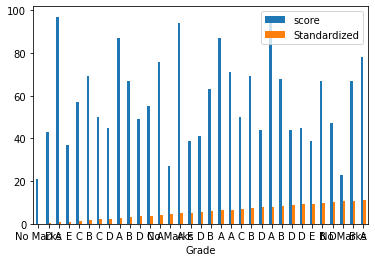

In [23]:
df.plot.bar(x='Grade',y=['score','Standardized'],rot=0);

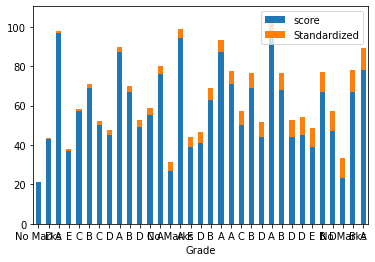

In [24]:
df.plot.bar(x='Grade',y=['score','Standardized'],rot=0,stacked=True);

In [25]:
df.columns

Index(['score', 'age', 'Category', 'Grade', 'Standardized'], dtype='object')

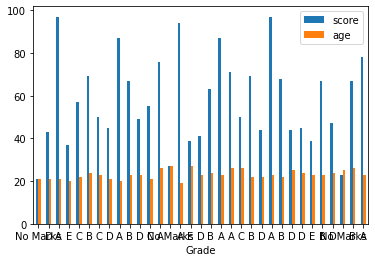

In [26]:
df.plot.bar(x='Grade',y=['score','age'],rot=0,stacked=False);

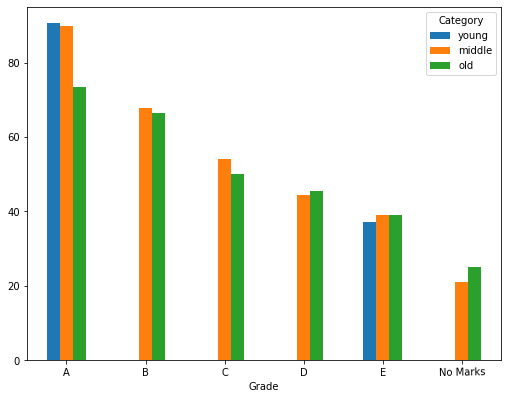

In [33]:
pd.pivot_table(df,columns='Category',values='score',index='Grade').plot(kind='bar',rot=True,figsize=(8.5,6.5) );